***

<img src="assets/logo_detection_cover.png" width="100%">
    
***

# Label Detection with Python, Google Vision API and google-vision-wrapper

### Introduction
In this quick tutorial we are going to show how to use google-vision-wrapper to perform logo detection on images. Please refer to the [Official Github Page](https://github.com/gcgrossi/google-vision-wrapper) for more information.

### Before you begin
Before starting, it is mandatory to correctly setup a Google Cloud Project, authorise the Google Vision API and generate a .json API key file. Be sure to have fulfilled all the steps in the [Before you Begin Guide](https://cloud.google.com/vision/docs/before-you-begin) before moving on.

### Imports

In [1]:
# the main class
from gvision import GVisionAPI

#other imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read The input image
You can read the input image in the way you prefer, the class accepts 2 formats:
1. numpy.ndarray
2. bytes

The Google Vision API accepts images in bytes format. If you chose to go on with numpy array the wrapper will perform the conversion. I always chose to read the image using OpenCV.

In [4]:
#read the image from disk
img = cv2.imread(os.path.join(os.getcwd(),'images','dunkin.jpg'))

we are going to use this image: 

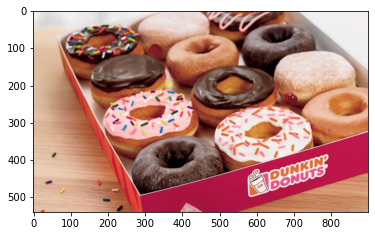

In [5]:
#show the image
#transform to RGB -> an OpenCV speciality
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

I'm sorry if you are hungry but this is my favourite ... Dunkin' Donuts! Let's see how to detect their logo on the image.

### Initialize the class
```authfile``` is the path to your API key file in .json format.

In [6]:
# path to auth key file
authfile = os.path.join(os.getcwd(),'gvision_auth.json')
gvision = GVisionAPI(authfile)

### Perform a request
The method we are goin to use is: ```.perform_request(img,option)```. It accepts 2 parameters:
1. the image already loaded
2. an option that specifies what kind of request to make

You can access the possibile options in this two ways:

In [7]:
# method to print request options
gvision.request_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.request_types)

Possible Request Options: 
* face detection
* landmark detection
* logo detection
* object detection
* label detection
* image properties
* text detection
* handwriting detection
* web detection

Possible Options:
dict_keys(['face detection', 'landmark detection', 'logo detection', 'object detection', 'label detection', 'image properties', 'text detection', 'handwriting detection', 'web detection'])


We are ready to perform the actual request. The body of the response from the API can be accessed using the  ```.response``` attribute.

In [8]:
#perform a request to the API
gvision.perform_request(img,'logo detection')

# print the response
print(gvision.response)

logo_annotations {
  mid: "/m/02ccc5"
  description: "Dunkin\' Donuts"
  score: 0.8068318
  bounding_poly {
    vertices {
      x: 572
      y: 381
    }
    vertices {
      x: 799
      y: 381
    }
    vertices {
      x: 799
      y: 503
    }
    vertices {
      x: 572
      y: 503
    }
  }
}



With one logo the output is still ok to parse, but with a very crowded image it can become quite verbose. Thank to google-vision-wrapper we can obtain.

### Obtaining the information as list
The information regarding the detection can be accessed using different methods. In the following, we are going to obtain all the annotations.

In [11]:
# obtaining lists 
headers,logos = gvision.logos()
print(headers)
print(logos)

['LOGO_NAME', 'CONFIDENCE', 'BBOX_1', 'BBOX_2', 'BBOX_3', 'BBOX_4']
[["Dunkin' Donuts", 0.8068317770957947, (572, 381), (799, 381), (799, 503), (572, 503)]]


Remember: for each logo detected (there could be more than 1) a list with the corresponding information is filled. I.e. the first logo is ```logos[0]```. As you can see, each list contains the logo name, the detection confidence and the coordinates of the bounding box surrounding it.

### Obtaining the information as pandas DataFrame
the same information can also de retrieved as a pandas DataFrame for convenience, using the method ```.to_df(option,name)```. It accepts 2 parameters:
1. an option, specifying the type of information to dump
2. the optional name or id of the image, that will be appended to each row of the DataFrame. Default is set to ```'image'```.

You can access the possible options in the two following ways:

In [12]:
# method to print df options
gvision.df_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.df_types)

Possible DataFrame Options: 
* face landmarks
* face
* head
* angles
* objects
* landmarks
* logos
* labels
* colors
* crop hints
* texts
* pages
* blocks
* paragraphs
* words
* symbols
* web entities
* matching images
* similar images

Possible Options:
dict_keys(['face landmarks', 'face', 'head', 'angles', 'objects', 'landmarks', 'logos', 'labels', 'colors', 'crop hints', 'texts', 'pages', 'blocks', 'paragraphs', 'words', 'symbols', 'web entities', 'matching images', 'similar images'])


Let's obtain the information.

In [13]:
# obtain the information as a pandas DataFrame
df_labels  =gvision.to_df('logos','donuts')
df_labels

,IMAGE_NAME,LOGO_NAME,CONFIDENCE,BBOX_1,BBOX_2,BBOX_3,BBOX_4
0,donuts,Dunkin' Donuts,0.806832,"(572, 381)","(799, 381)","(799, 503)","(572, 503)"


### Draw the results
You can now draw the results in the way you prefer. I will do it using OpenCV.

True

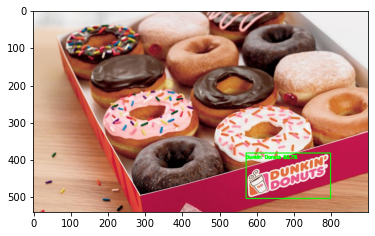

In [15]:
#copy the original image
#transform to RGB -> an OpenCV speciality
boxed = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# draw rectangles and information 
# on the detected logos
for logo in logos:
    
    name = logo[0]
    score = logo[1]*100
    
    tl,tr,br,bl = logo[2],logo[3],logo[4],logo[5]
    cv2.rectangle(boxed, (int(tl[0]),int(tl[1])), (int(br[0]),int(br[1])), (0, 255, 0), 2)
    
    # draw name and confidence
    cv2.putText(boxed, "{} {:.1f}%".format(name,score), (int(tl[0]), int(tl[1] + 15)), cv2.FONT_HERSHEY_SIMPLEX,0.4, (0, 255, 0), 2)

#show the image
plt.imshow(boxed)

# save to disk
output = cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(os.getcwd(),'assets','output_dunkin.jpg'), output)

And here we are! With a very few lines of code we were able to detect the logo associated with this box of donuts. I'm sorry, I should have written also something regarding Google Maps API and how to find the nearest to your place because writing this tutorial made me very very hungry! I will go and grab a coffee and a 12 box for my colleagues before starting my coding session!

## _'Hasta la ciambella, siempre!'_
<img src="assets/homer_donuts.png" width="30%">